In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
# Load the 3 CSV files (change the path if saved elsewhere)
confirmed = pd.read_csv('/Users/user/Downloads/COVID/time_series_covid19_confirmed_global-2.csv')
deaths = pd.read_csv('/Users/user/Downloads/COVID/time_series_covid19_deaths_global-2.csv')
recovered = pd.read_csv('/Users/user/Downloads/COVID/time_series_covid19_recovered_global-2.csv')

In [28]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [30]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [32]:
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [36]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [38]:
confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,287.000000,287.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
mean,19.718719,22.182084,1.927336,2.273356,3.266436,4.972318,7.335640,10.134948,19.307958,21.346021,...,2.336755e+06,2.337519e+06,2.338173e+06,2.338805e+06,2.338992e+06,2.339187e+06,2.339387e+06,2.339839e+06,2.340460e+06,2.341073e+06
std,25.956609,77.870931,26.173664,26.270191,32.707271,45.523871,63.623197,85.724481,210.329649,211.628535,...,8.506608e+06,8.511285e+06,8.514488e+06,8.518031e+06,8.518408e+06,8.518645e+06,8.519346e+06,8.521641e+06,8.524968e+06,8.527765e+06
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.072192,-32.823050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04
50%,21.512583,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05
75%,40.401784,89.224350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.051998e+06,1.052122e+06,1.052247e+06,1.052382e+06,1.052519e+06,1.052664e+06,1.052664e+06,1.052926e+06,1.053068e+06,1.053213e+06
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,1.034435e+08,1.035339e+08,1.035898e+08,1.036487e+08,1.036508e+08,1.036470e+08,1.036555e+08,1.036909e+08,1.037558e+08,1.038027e+08


In [40]:
confirmed.shape

(289, 1147)

In [42]:
confirmed.isnull().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

In [66]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [44]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [46]:
deaths.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,287.000000,287.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
mean,19.718719,22.182084,0.058824,0.062284,0.089965,0.145329,0.193772,0.283737,0.453287,0.460208,...,2.378091e+04,2.378707e+04,2.379249e+04,2.379697e+04,2.379793e+04,2.379844e+04,2.379971e+04,2.380290e+04,2.380790e+04,2.381246e+04
std,25.956609,77.870931,1.000000,1.001525,1.413797,2.353998,3.060245,4.471644,7.353103,7.353616,...,9.337339e+04,9.341836e+04,9.345110e+04,9.347703e+04,9.347884e+04,9.347810e+04,9.348106e+04,9.349767e+04,9.352985e+04,9.355567e+04
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.072192,-32.823050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01
50%,21.512583,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.440000e+02,9.440000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02
75%,40.401784,89.224350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.721000e+03,8.727000e+03,8.727000e+03
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,1.119917e+06,1.120897e+06,1.121658e+06,1.122165e+06,1.122172e+06,1.122134e+06,1.122181e+06,1.122516e+06,1.123246e+06,1.123836e+06


In [48]:
deaths.shape

(289, 1147)

In [52]:
deaths.isnull().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

In [68]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.4+ MB


In [58]:
recovered.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,273.000000,273.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,...,274.0,274.0,274.0,274.0,274.0,274.0,274.0,274.0,274.0,274.0
mean,18.318242,27.325980,0.109489,0.116788,0.142336,0.153285,0.204380,0.237226,0.394161,0.463504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,25.442128,75.783947,1.695410,1.699238,1.886378,1.949511,2.568159,2.761311,4.866508,5.352804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.919300,-9.696600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,19.195900,23.881300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,39.074200,95.995600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
recovered.shape

(274, 1147)

In [62]:
recovered.isnull().sum()

Province/State    199
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

In [70]:
# Select Nigeria's row
nigeria_confirmed = confirmed[confirmed['Country/Region'] == 'Nigeria']
nigeria_deaths = deaths[deaths['Country/Region'] == 'Nigeria']
nigeria_recovered = recovered[recovered['Country/Region'] == 'Nigeria']

In [72]:
# Drop metadata and rotate so dates become the index
nigeria_confirmed = nigeria_confirmed.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).T
nigeria_deaths = nigeria_deaths.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).T
nigeria_recovered = nigeria_recovered.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).T

In [76]:
# Convert index to datetime
# Use the correct date format to suppress warnings and improve performance
nigeria_confirmed.index = pd.to_datetime(nigeria_confirmed.index, format='%m/%d/%y')
nigeria_deaths.index = pd.to_datetime(nigeria_deaths.index, format='%m/%d/%y')
nigeria_recovered.index = pd.to_datetime(nigeria_recovered.index, format='%m/%d/%y')

In [78]:
#How to Know the Format
print(nigeria_confirmed.index[:5])

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26'],
              dtype='datetime64[ns]', freq=None)


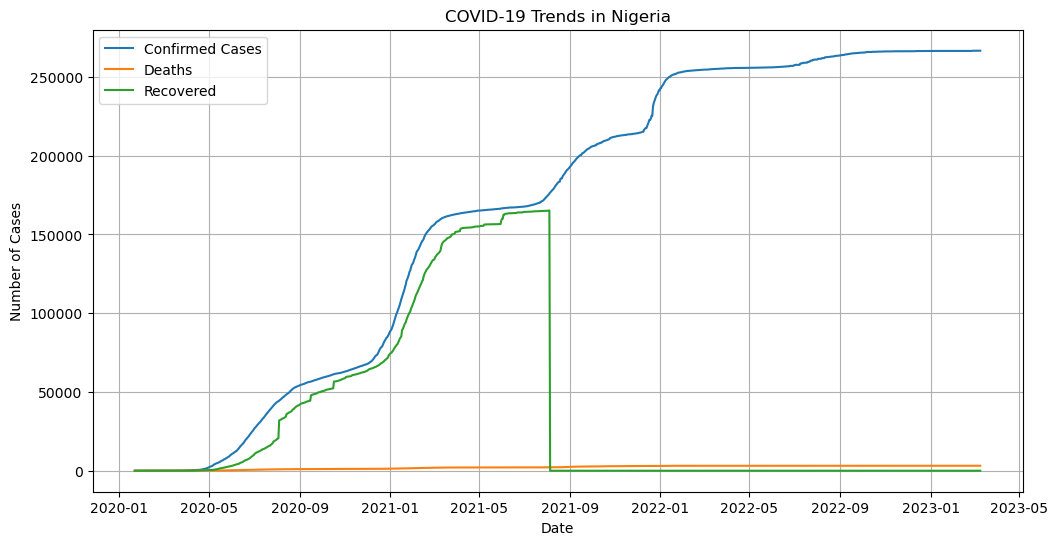

In [80]:
plt.figure(figsize=(12,6))
plt.plot(nigeria_confirmed, label='Confirmed Cases')
plt.plot(nigeria_deaths, label='Deaths')
plt.plot(nigeria_recovered, label='Recovered')
plt.title('COVID-19 Trends in Nigeria')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

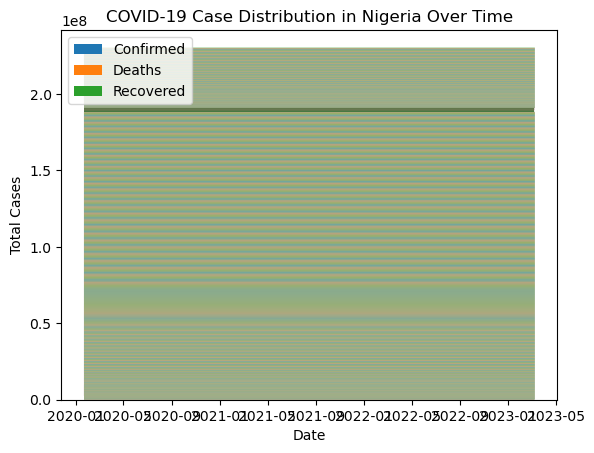

In [86]:
plt.stackplot(
    nigeria_confirmed.index,
    nigeria_confirmed.values,
    nigeria_deaths.values,
    nigeria_recovered.values,
    labels=['Confirmed', 'Deaths', 'Recovered'],
    colors=['#1f77b4', '#ff7f0e', '#2ca02c']
)
plt.legend(loc='upper left')
plt.title('COVID-19 Case Distribution in Nigeria Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.show()

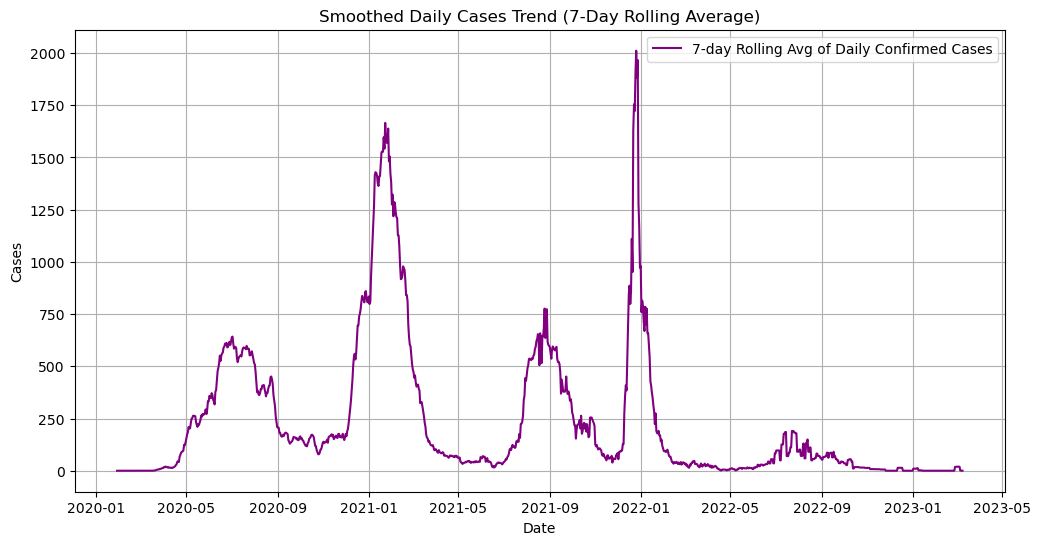

In [90]:
rolling_avg = nigeria_confirmed.diff().rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(rolling_avg, label='7-day Rolling Avg of Daily Confirmed Cases', color='purple')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Smoothed Daily Cases Trend (7-Day Rolling Average)')
plt.grid(True)
plt.legend()
plt.show()

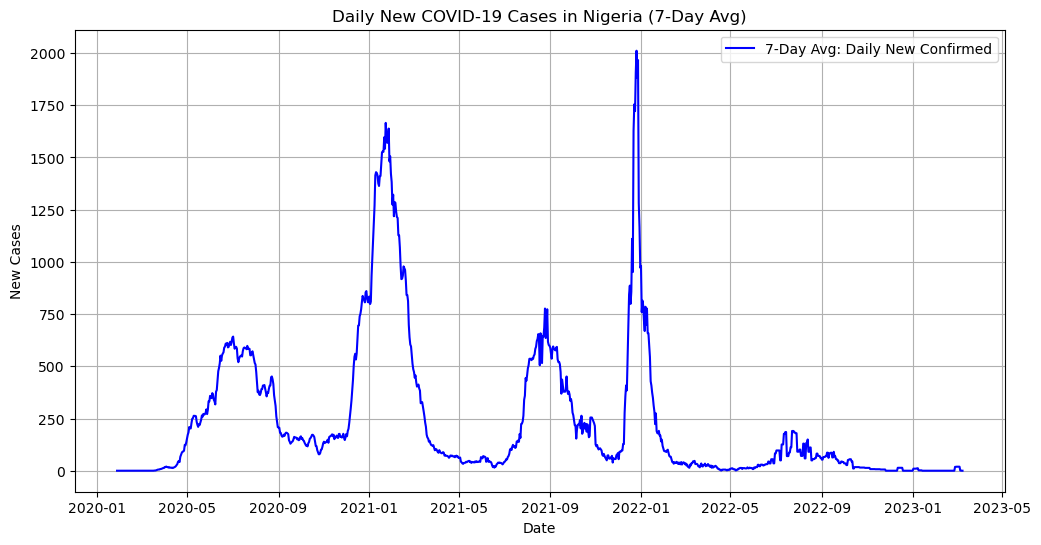

In [98]:
# Daily new cases (confirmed)
daily_confirmed = nigeria_confirmed.diff().fillna(0)

# 7-day rolling average
rolling_confirmed = daily_confirmed.rolling(window=7).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(rolling_confirmed, label='7-Day Avg: Daily New Confirmed', color='blue')
plt.title('Daily New COVID-19 Cases in Nigeria (7-Day Avg)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.legend()
plt.show()

In [100]:
peak_date_cases = nigeria_confirmed.idxmax()
peak_value_cases = nigeria_confirmed.max()

peak_date_deaths = nigeria_deaths.idxmax()
peak_value_deaths = nigeria_deaths.max()

print(f"🦠 Peak Confirmed Cases: {peak_value_cases} on {peak_date_cases}")
print(f"💀 Peak Deaths: {peak_value_deaths} on {peak_date_deaths}")

🦠 Peak Confirmed Cases: 206    266598
dtype: int64 on 206   2023-03-01
dtype: datetime64[ns]
💀 Peak Deaths: 206    3155
dtype: int64 on 206   2022-09-13
dtype: datetime64[ns]


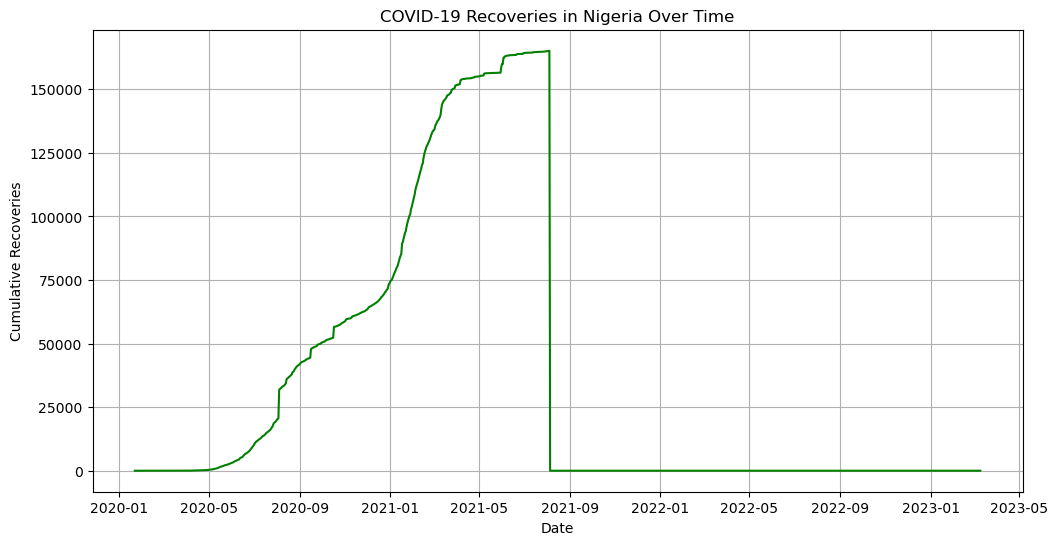

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(nigeria_recovered, color='green')
plt.title('COVID-19 Recoveries in Nigeria Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Recoveries')
plt.grid(True)
plt.show()

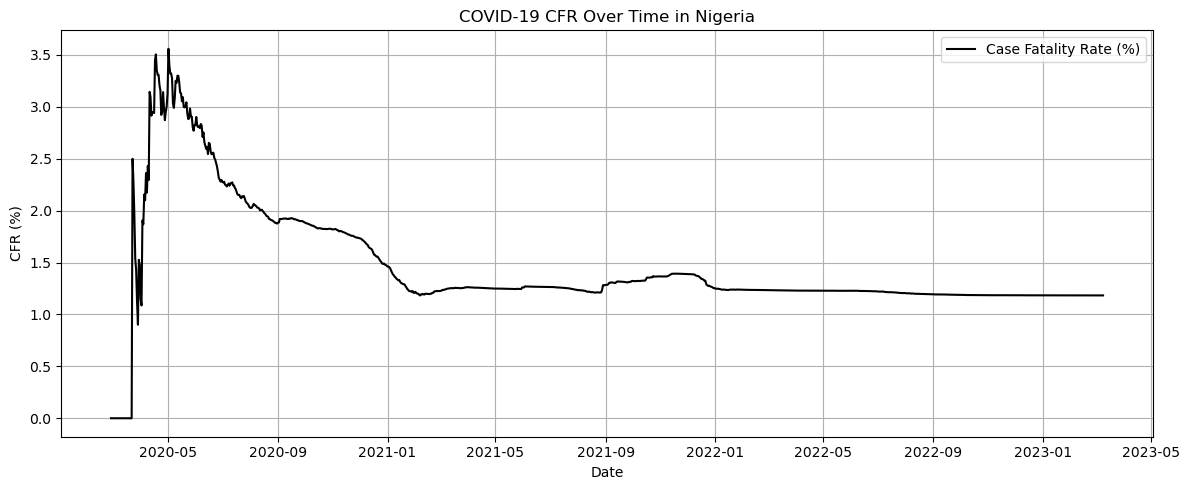

In [104]:
cfr = (nigeria_deaths / nigeria_confirmed) * 100

plt.figure(figsize=(12, 5))
plt.plot(cfr, label='Case Fatality Rate (%)', color='black')
plt.title('COVID-19 CFR Over Time in Nigeria')
plt.xlabel('Date')
plt.ylabel('CFR (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [112]:
# Calculate daily new confirmed cases
daily_new_cases = nigeria_confirmed.diff().fillna(0)

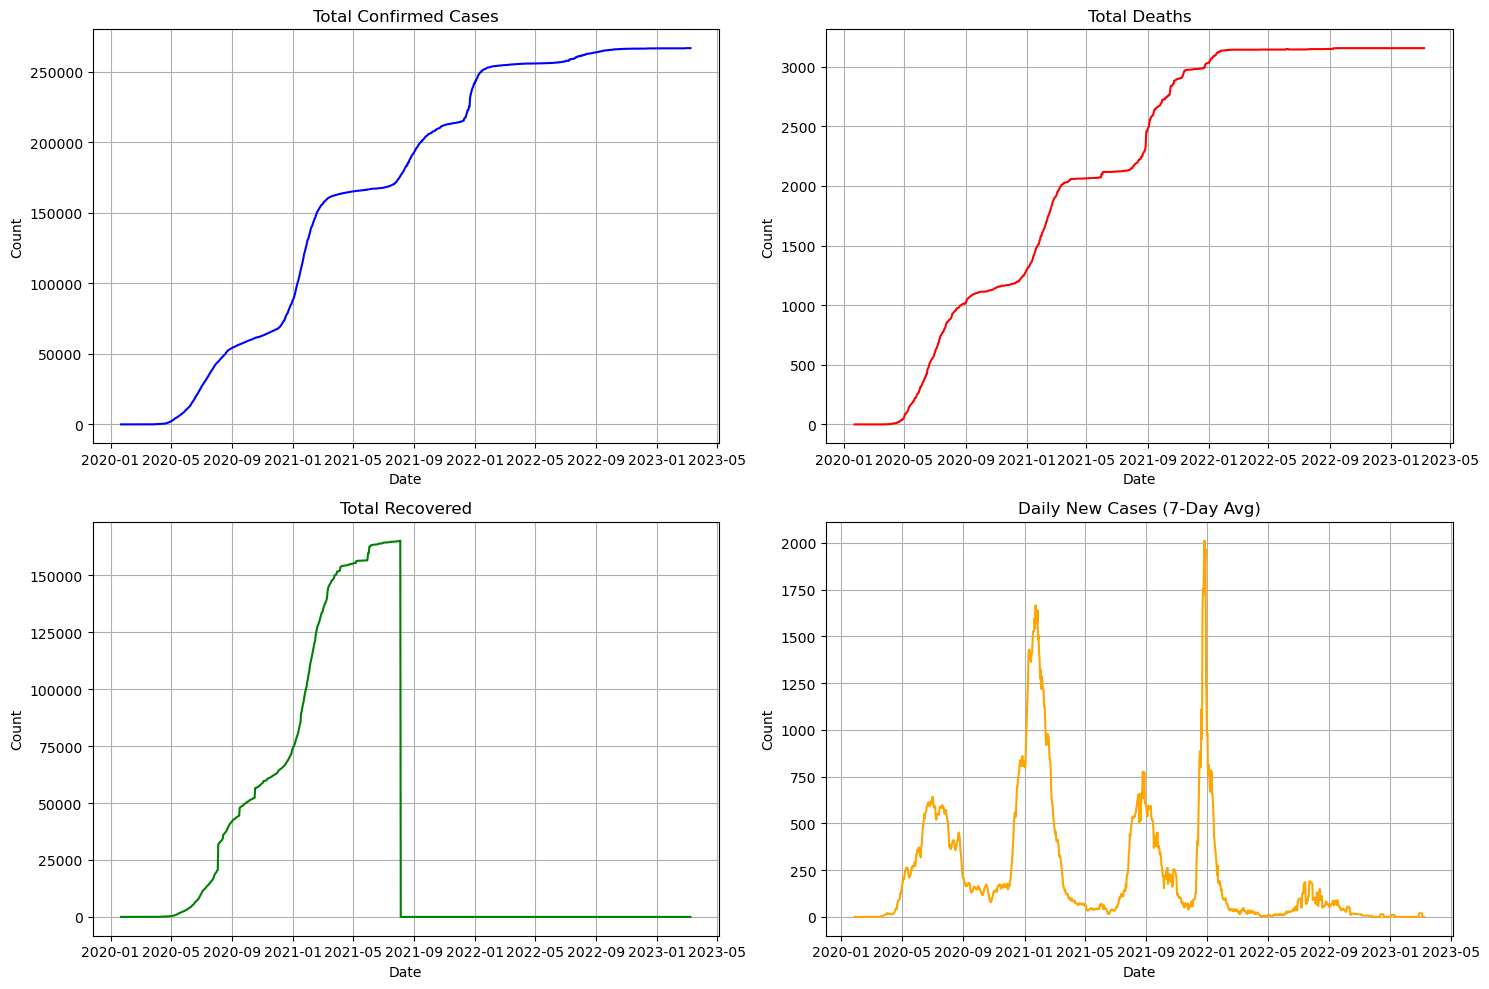

In [114]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(nigeria_confirmed, color='blue')
axs[0, 0].set_title('Total Confirmed Cases')

axs[0, 1].plot(nigeria_deaths, color='red')
axs[0, 1].set_title('Total Deaths')

axs[1, 0].plot(nigeria_recovered, color='green')
axs[1, 0].set_title('Total Recovered')

axs[1, 1].plot(daily_new_cases.rolling(7).mean(), color='orange')
axs[1, 1].set_title('Daily New Cases (7-Day Avg)')

for ax in axs.flat:
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.grid(True)

plt.tight_layout()
plt.show()

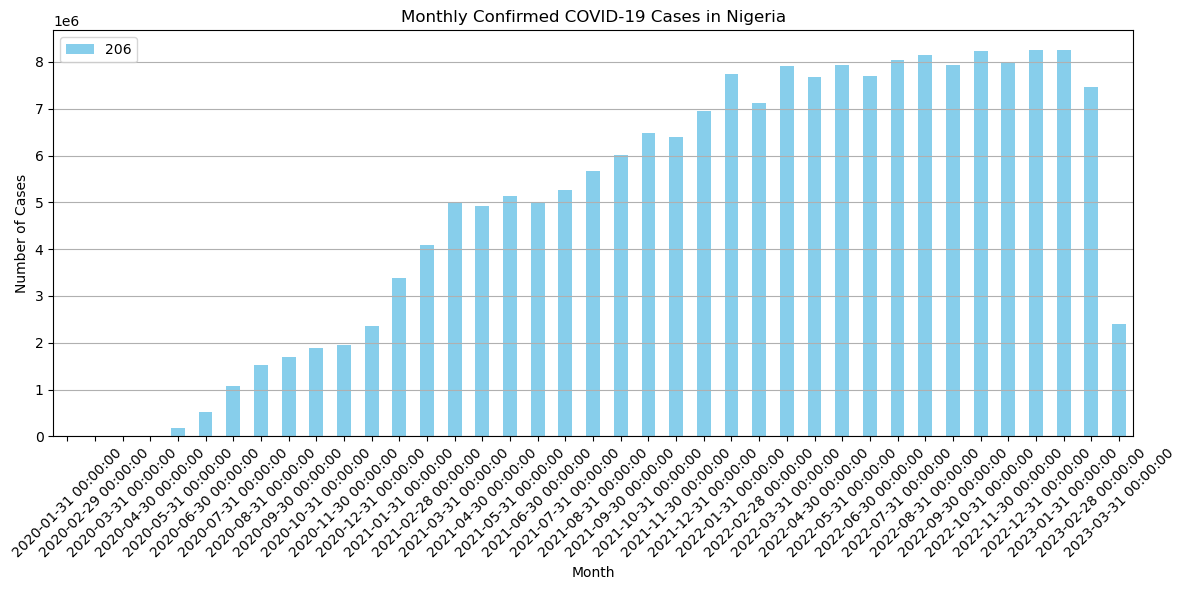

In [116]:
monthly_confirmed = nigeria_confirmed.resample('M').sum()

monthly_confirmed.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Monthly Confirmed COVID-19 Cases in Nigeria')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

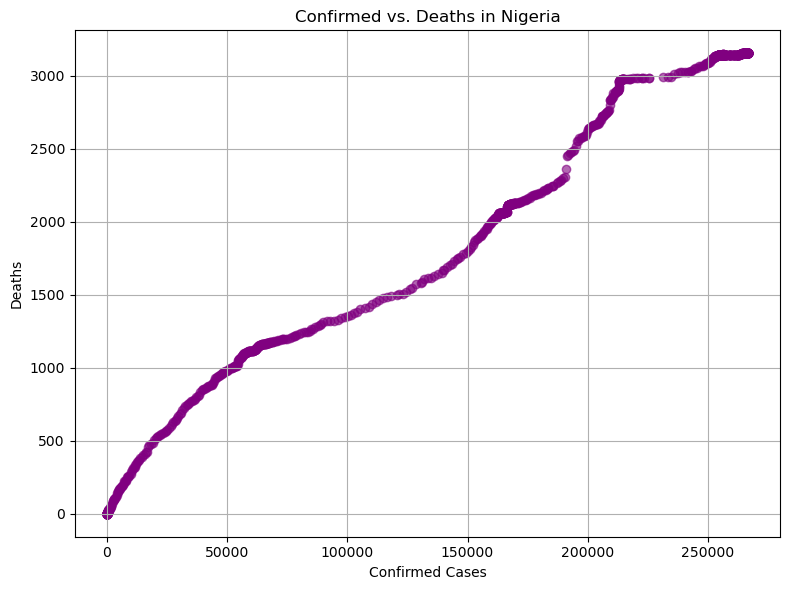

In [124]:
plt.figure(figsize=(8, 6))
plt.scatter(nigeria_confirmed, nigeria_deaths, alpha=0.6, color='purple')
plt.title('Confirmed vs. Deaths in Nigeria')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

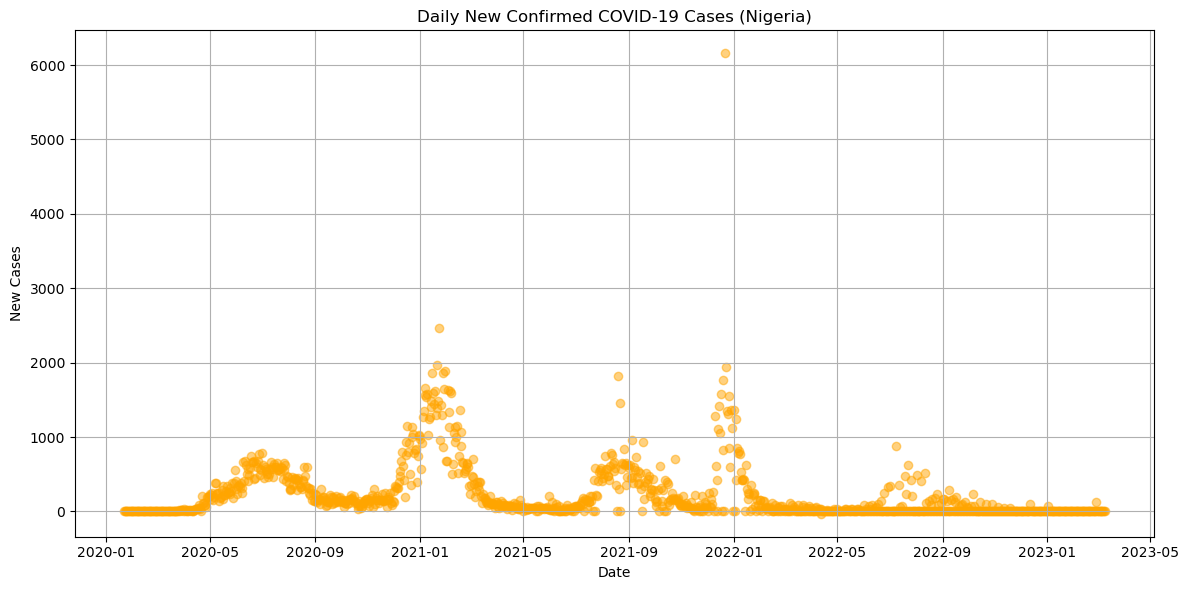

In [126]:
# Calculate daily new cases
daily_new_cases = nigeria_confirmed.diff().fillna(0)

# Plot scatter
plt.figure(figsize=(12, 6))
plt.scatter(daily_new_cases.index, daily_new_cases, color='orange', alpha=0.5)
plt.title('Daily New Confirmed COVID-19 Cases (Nigeria)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.tight_layout()
plt.show()